In [1]:
import numpy as np
import copy
from rustworkx.visualization import graphviz_draw
from classic_fib import FibCode
import networkx as nx 
import rustworkx as rx 
def mprintboard(matrix, L= 4):
    if matrix.shape == ((L**2)//2,):
        matrix.shape = (L//2,L)
        print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
        matrix.shape =  ((L**2)//2,)
    else:
        print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix])) 
    
def syn_meas(check_matrix, board):
    return np.matmul(check_matrix, board)%2
    

In [8]:
L=8
error_board_init = np.zeros((L**2)//2, dtype=int)
error_board_init[0] = 1
error_board_init[8] = 1 
f = FibCode(L, p=0, error_board_override=error_board_init)
res, restech = f.decode_fib_code()


PROBs:current fundy:
[[0 1 1 0 1 0 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 1 0 1 0 1 0]]
current board w error is: 
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
current_parity_check_mat:
[[0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

hori_indx in fund symm: 27
verti_indx in fund symm: 31


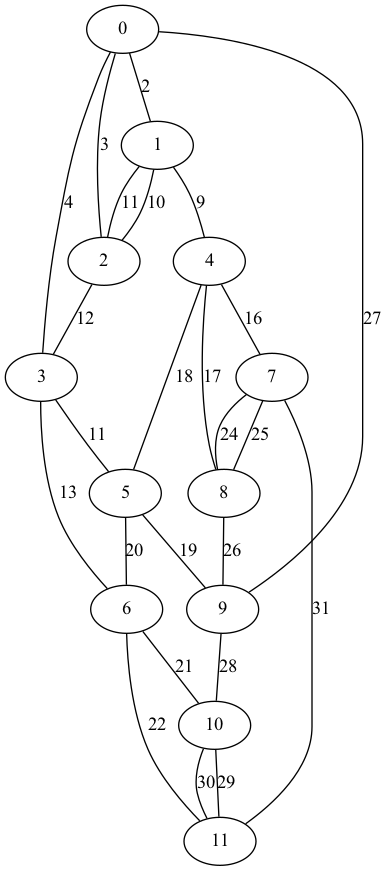

In [9]:
f.decode_fib_code()
node_attr, edge_attr = f.decoder.graph_label_attr_fn()
print(f"hori_indx in fund symm: {f.decoder.hori_probe_fault_id}")
print(f"verti_indx in fund symm: {f.decoder.verti_probe_fault_id}")
graphviz_draw(f.decoder.matching_graph, edge_attr_fn=edge_attr, node_attr_fn=node_attr)

In [10]:
print(res)
print(restech)

yay! success
[0, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'hori']


In [11]:
f.original_errors_board

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
f.board

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])